# Keras Tutorial

To install keras, in terminal: pip install keras

In [3]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

## Import relevant libraries

If this give some error saying tensorflow not found, go to terminal: gedit ~/.keras/keras.json and change backend to `theano` from `tensorflow`

In [4]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import  SGD
from keras.utils import np_utils
from keras import backend as K

Using Theano backend.


Few hyper parameters of the network

In [5]:
nb_classes = 10
# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

Download MNIST data

In [6]:
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, y_train.shape, X_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28)


Visualize a few training images

In [7]:
y_train[1]

0

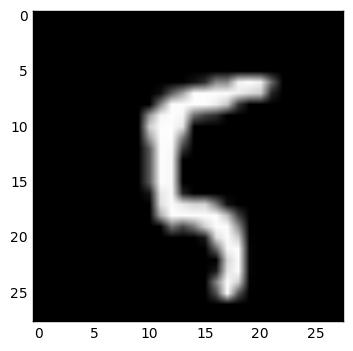

5


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[100], cmap='gray')
plt.show()
print(y_train[100])

In [9]:
K.image_dim_ordering()

'tf'

In [10]:
X_train = X_train.reshape(X_train.shape[0],img_rows,img_cols,1)
input_shape = (img_rows, img_cols,1)


In [11]:
if K.image_dim_ordering() == 'th':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

Normalization is important for convergence

In [12]:
type(X_train)


numpy.ndarray

In [13]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')


X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


Convert to one-hot vector

In [14]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [15]:
print(y_train[100], Y_train[100])

5 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


## Things to Note:

1. Relu activation.
2. What's dropout/regularization?
3. What's a softmax?
3. Which block contains highest number of parameters?
4. What is the cost function here?

## Decalare your model

Experiment with this model. Put more convolutional layers and maxpooling layers for example.

In [16]:
model = Sequential()

model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))
model.add(BatchNormalization(axis=1))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
model.add(BatchNormalization(axis=1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(BatchNormalization())
model.add(Activation('softmax'))
print(model.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 26, 26, 32)    320         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
batchnormalization_1 (BatchNorma (None, 26, 26, 32)    52          convolution2d_1[0][0]            
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 26, 26, 32)    0           batchnormalization_1[0][0]       
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 24, 24, 32)    9248        activation_1[0][0]               
___________________________________________________________________________________________

## Train your model.

Using stochastic gradient descent. Keras computes gradients automatically for you.

If loss doesn't go down in the first epoch, it means your network is not working great. You might have to stop and tune learning rate.

Network is much more resistant to bad LR when you use batchnorm. But it slows things down.

In [15]:
#note that lr=1 is probably high. But it works because of batchnorm.
#try without batchnorm.  
sgd = SGD(lr=1, decay=1e-6, momentum=0.9)

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

batch_size = 128
nb_epoch = 12

model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=1, validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test, verbose=0)
y_pred = model.predict_classes(X_test)

print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 481s - loss: 0.4195 - acc: 0.8690 - val_loss: 0.1664 - val_acc: 0.9494
Epoch 2/12
60000/60000 [==============================] - 475s - loss: 0.2801 - acc: 0.9146 - val_loss: 0.1423 - val_acc: 0.9592
Epoch 3/12
60000/60000 [==============================] - 435s - loss: 0.2266 - acc: 0.9303 - val_loss: 0.1182 - val_acc: 0.9648
Epoch 4/12
60000/60000 [==============================] - 450s - loss: 0.1856 - acc: 0.9435 - val_loss: 0.0807 - val_acc: 0.9722
Epoch 5/12
60000/60000 [==============================] - 451s - loss: 0.1488 - acc: 0.9537 - val_loss: 0.0679 - val_acc: 0.9789
Epoch 6/12
60000/60000 [==============================] - 484s - loss: 0.1241 - acc: 0.9618 - val_loss: 0.0584 - val_acc: 0.9804
Epoch 7/12
60000/60000 [==============================] - 462s - loss: 0.1121 - acc: 0.9660 - val_loss: 0.0485 - val_acc: 0.9834
Epoch 8/12
60000/60000 [=======================

## Check the predictions

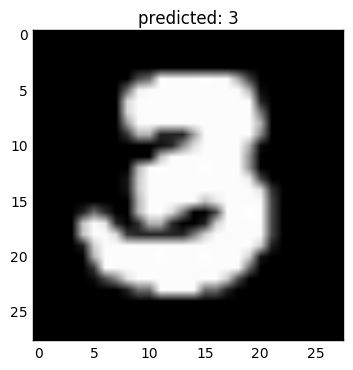

In [16]:
n = 200 #vary this. 
plt.imshow(X_test[n].reshape(28,28), cmap='gray')
plt.title('predicted: {}'.format(y_pred[n]))
plt.show()

## Find the wrong predictions

Note that a few of these are not so simple, even for humans

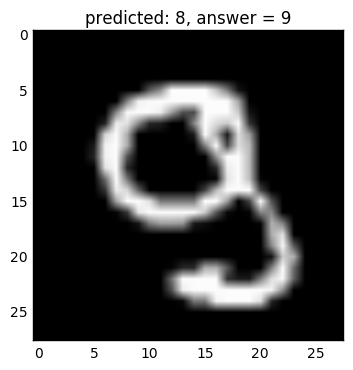

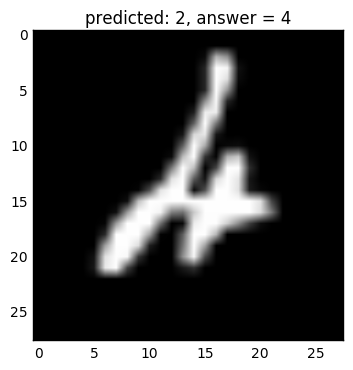

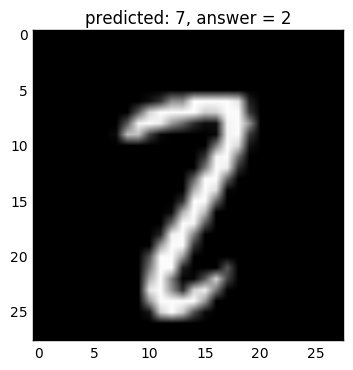

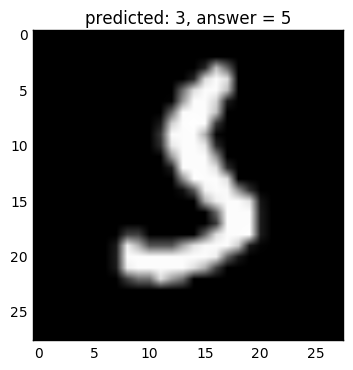

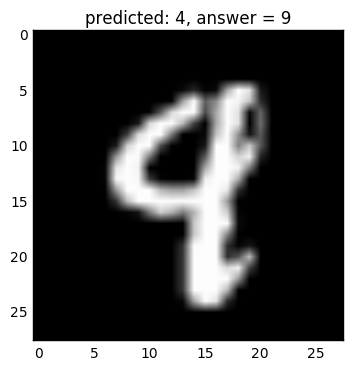

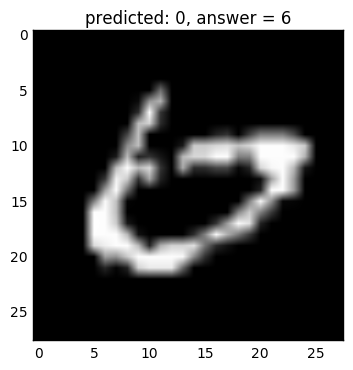

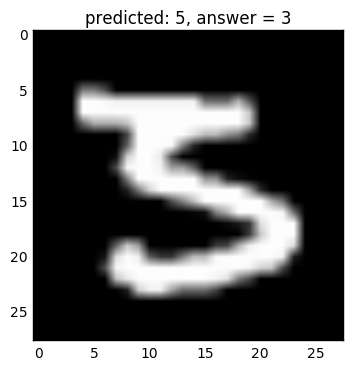

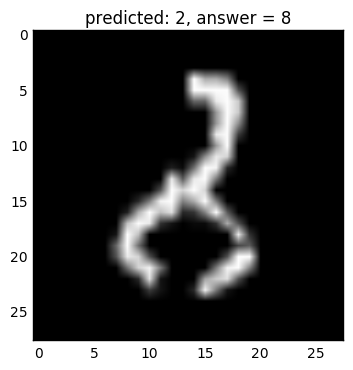

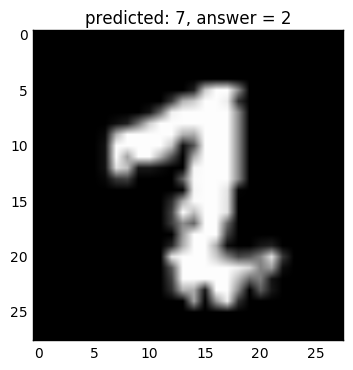

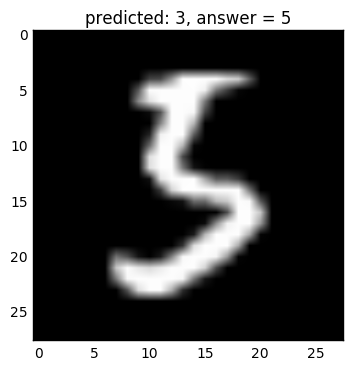

In [17]:
wrong_indices = np.where(y_pred != y_test)[0]
for n in wrong_indices[:10]:
    plt.imshow(X_test[n].reshape(28,28), cmap='gray')
    plt.title('predicted: {}, answer = {}'.format(y_pred[n], y_test[n]))
    plt.show()

In [18]:
import h5py
import gzip
import json

model_metadata = json.loads(model.to_json())

with open('mnist_mlp_keras_model.json', 'w') as f:
    json.dump(model_metadata, f)

In [19]:
model_metadata

{'class_name': 'Sequential',
 'config': [{'class_name': 'Convolution2D',
   'config': {'W_constraint': None,
    'W_regularizer': None,
    'activation': 'linear',
    'activity_regularizer': None,
    'b_constraint': None,
    'b_regularizer': None,
    'batch_input_shape': [None, 28, 28, 1],
    'bias': True,
    'border_mode': 'valid',
    'dim_ordering': 'tf',
    'init': 'glorot_uniform',
    'input_dtype': 'float32',
    'name': 'convolution2d_1',
    'nb_col': 3,
    'nb_filter': 32,
    'nb_row': 3,
    'subsample': [1, 1],
    'trainable': True}},
  {'class_name': 'BatchNormalization',
   'config': {'axis': 1,
    'beta_regularizer': None,
    'epsilon': 1e-05,
    'gamma_regularizer': None,
    'mode': 0,
    'momentum': 0.99,
    'name': 'batchnormalization_1',
    'trainable': True}},
  {'class_name': 'Activation',
   'config': {'activation': 'relu',
    'name': 'activation_1',
    'trainable': True}},
  {'class_name': 'Convolution2D',
   'config': {'W_constraint': None,
  

In [20]:
model.save_weights('mnist_mlp_keras_weights.hdf5')

In [25]:
model.load_weights('mnist_mlp_keras_weights.hdf5')

In [23]:
import h5py
import json
import gzip

layer_name_dict = {
    'Merge': 'mergeLayer',
    'Dense': 'denseLayer',
    'Dropout': 'dropoutLayer',
    'Flatten': 'flattenLayer',
    'Embedding': 'embeddingLayer',
    'BatchNormalization': 'batchNormalizationLayer',
    'LeakyReLU': 'leakyReLULayer',
    'PReLU': 'parametricReLULayer',
    'ParametricSoftplus': 'parametricSoftplusLayer',
    'ThresholdedLinear': 'thresholdedLinearLayer',
    'ThresholdedReLu': 'thresholdedReLuLayer',
    'LSTM': 'rLSTMLayer',
    'GRU': 'rGRULayer',
    'Convolution2D': 'convolution2DLayer',
    'MaxPooling2D': 'maxPooling2DLayer',
    'Convolution1D': 'convolution1DLayer',
    'MaxPooling1D': 'maxPooling1DLayer'
}

layer_params_dict = {
    'Merge': ['layers', 'mode', 'concat_axis', 'dot_axes'],
    'Dense': ['weights', 'activation'],
    'Dropout': ['p'],
    'Flatten': [],
    'Embedding': ['weights', 'mask_zero'],
    'BatchNormalization': ['weights', 'epsilon'],
    'LeakyReLU': ['alpha'],
    'PReLU': ['weights'],
    'ParametricSoftplus': ['weights'],
    'ThresholdedLinear': ['theta'],
    'ThresholdedReLu': ['theta'],
    'LSTM': ['weights', 'activation', 'inner_activation', 'return_sequences'],
    'GRU': ['weights', 'activation', 'inner_activation', 'return_sequences'],
    'Convolution2D': ['weights', 'nb_filter', 'nb_row', 'nb_col', 'border_mode', 'subsample', 'activation'],
    'MaxPooling2D': ['pool_size', 'stride', 'ignore_border'],
    'Convolution1D': ['weights', 'nb_filter', 'filter_length', 'border_mode', 'subsample_length', 'activation'],
    'MaxPooling1D': ['pool_length', 'stride', 'ignore_border']
}

layer_weights_dict = {
    'Dense': ['W', 'b'],
    'Embedding': ['E'],
    'BatchNormalization': ['gamma', 'beta', 'mean', 'std'],
    'PReLU': ['alphas'],
    'ParametricSoftplus': ['alphas', 'betas'],
    'LSTM': ['W_xi', 'W_hi', 'b_i', 'W_xc', 'W_hc', 'b_c', 'W_xf', 'W_hf', 'b_f', 'W_xo', 'W_ho', 'b_o'],
    'GRU': ['W_xz', 'W_hz', 'b_z', 'W_xr', 'W_hr', 'b_r', 'W_xh', 'W_hh', 'b_h'],
    'Convolution2D': ['W', 'b'],
    'Convolution1D': ['W', 'b']
}

def appr_f32_prec(arr):
    arr_formatted = []
    for item in arr:
        if type(item) is list:
            arr_formatted.append(appr_f32_prec(item))
        elif type(item) is float:
            arr_formatted.append(float('{:.7f}'.format(item)))
        else:
            arr_formatted.append(item)
    return arr_formatted

def get_layer_params(layer, weights_file, layer_num, param_num_offset):
    layer_params = []
    for param in layer_params_dict[layer['name']]:
        if param == 'weights':
            weights = {}
            weight_names = layer_weights_dict[layer['name']]
            for p, name in enumerate(weight_names):
                arr = weights_file.get('layer_{}/param_{}'.format(layer_num, p + param_num_offset)).value
                if arr.dtype == 'float32':
                    weights[name] = appr_f32_prec(arr.tolist())
                else:
                    weights[name] = arr.tolist()
            layer_params.append(weights)
        elif param == 'layers':
            # for merge layer
            merge_branches = []
            param_num_offset_update = param_num_offset
            for merge_branch in layer['layers']:
                merge_branch_layers = []
                for merge_branch_layer in merge_branch['layers']:
                    merge_branch_layer_params = get_layer_params(merge_branch_layer, weights_file, layer_num, param_num_offset_update)
                    if merge_branch_layer['name'] in layer_weights_dict:
                        param_num_offset_update += len(layer_weights_dict[merge_branch_layer['name']])
                    merge_branch_layers.append({
                        'layerName': layer_name_dict[merge_branch_layer['name']],
                        'parameters': merge_branch_layer_params
                    })
                merge_branches.append(merge_branch_layers)
            layer_params.append(merge_branches)
        elif param in layer:
            layer_params.append(layer[param])
    return layer_params


def serialize(model_json_file, weights_hdf5_file, save_filepath, compress):
    with open(model_json_file, 'r') as f:
        model_metadata = json.load(f)
    weights_file = h5py.File(weights_hdf5_file, 'r')

    layers = []

    num_activation_layers = 0
    for k, layer in enumerate(model_metadata['config']):
        if layer['class_name'] == 'Activation':
            num_activation_layers += 1
            prev_layer_name = model_metadata['config'][k-1]['class_name']
            idx_activation = layer_params_dict[prev_layer_name].index('activation')
            layers[k-num_activation_layers]['parameters'][idx_activation] = layer['config']['activation']
            continue

        layer_params = []

        for param in layer_params_dict[layer['class_name']]:
            if param == 'weights':
                layer_weights = list(weights_file.keys())
                weights = {}
                weight_names = layer_weights_dict[layer['class_name']]
                for name in weight_names:
                    weights[name] = weights_file.get('{}/{}_{}'.format(layer['config']['name'], layer['config']['name'], name)).value.tolist()
                # for name, w in zip(weight_names, layer_weights):
                #     weights[name] = weights_file.get('layer_{}/{}'.format(k, w)).value.tolist()
                layer_params.append(weights)
            else:
                layer_params.append(layer['config'][param])

        layers.append({
            'layerName': layer_name_dict[layer['class_name']],
            'parameters': layer_params
        })


    if compress:
        with gzip.open(save_filepath, 'wb') as f:
            f.write(json.dumps(layers).encode('utf8'))
    else:
        with open(save_filepath, 'w') as f:
            json.dump(layers, f)

In [24]:
serialize('dl_test_mlp_keras_model.json', 
          'dl_test_mlp_keras_weights.hdf5', 
          'dl_test_mlp_model_params.json.gz', 
          True)

AttributeError: 'NoneType' object has no attribute 'value'